In [947]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [948]:
%load_ext numpy_html

The numpy_html extension is already loaded. To reload it, use:
  %reload_ext numpy_html


In [949]:
%%html
<style>
table {margin-top: 16pt;}
td {font-family: Arial, Helvetica, sans-serif !important; font-weight: 600; white-space: normal !important;}
tr:nth-child(even) {background: #b0d9eb !important; color: black}
tr:nth-child(odd) {background: #8fb1bf !important; color: black}
</style>

In [950]:
df = pd.read_csv("best-countries-to-live-in-2024.csv")

df.head()

,country,population_2024,population_growthRate,land_area,region,population_density,population_densityMi,Hdi2021,Hdi2020,WorldHappiness2022
0,India,1441719852,0.00916,3287590,Asia,484.9067,1255.9084,0.633,0.642,3.777
1,China,1425178782,-0.00035,9706961,Asia,151.2174,391.6530,0.768,0.764,5.585
2,United States,341814420,0.00535,9372610,North America,37.3673,96.7813,0.921,0.920,6.977
3,Indonesia,279798049,0.00816,1904569,Asia,149.0254,385.9758,0.705,0.709,5.240
4,Pakistan,245209815,0.01964,881912,Asia,318.0908,823.8551,0.544,0.543,4.516


In [951]:
df.describe()

,population_2024,population_growthRate,land_area,population_density,population_densityMi,Hdi2021,Hdi2020,WorldHappiness2022
count,1.400000e+02,140.000000,1.400000e+02,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.455532e+07,0.009388,8.796615e+05,223.692408,579.363334,0.735664,0.736086,5.543421
std,1.755194e+08,0.012133,2.206831e+06,747.637669,1936.381565,0.153310,0.151803,1.109171
min,3.776890e+05,-0.030870,3.160000e+02,2.243100,5.809600,0.394000,0.397000,2.404000
25%,5.438707e+06,0.001413,6.511475e+04,36.940500,95.675875,0.605750,0.609500,4.725500
50%,1.214023e+07,0.009015,2.384620e+05,86.376850,223.716100,0.753000,0.756000,5.581500
75%,3.938572e+07,0.018305,6.583170e+05,157.201525,407.151850,0.868250,0.870250,6.297000
max,1.441720e+09,0.038090,1.709824e+07,8429.956800,21833.588200,0.962000,0.959000,7.821000


In [952]:
sorted_df = df.sort_values(by='WorldHappiness2022', ascending=False)
result_table = sorted_df[['country', 'WorldHappiness2022']]
result_table

# sorted by WorldHappiness2022, checked top and bottom countries

,country,WorldHappiness2022
101,Finland,7.821
99,Denmark,7.636
139,Iceland,7.557
87,Switzerland,7.512
63,Netherlands,7.415
...,...,...
122,Botswana,3.471
66,Rwanda,3.268
65,Zimbabwe,2.995
107,Lebanon,2.955


In [953]:
variables = ['region']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

# splited regions into columns

In [954]:
df.head()

,country,population_2024,population_growthRate,land_area,population_density,population_densityMi,Hdi2021,Hdi2020,WorldHappiness2022,region_Africa,region_Asia,region_Europe,region_North America,region_Oceania,region_South America
0,India,1441719852,0.00916,3287590,484.9067,1255.9084,0.633,0.642,3.777,0,1,0,0,0,0
1,China,1425178782,-0.00035,9706961,151.2174,391.6530,0.768,0.764,5.585,0,1,0,0,0,0
2,United States,341814420,0.00535,9372610,37.3673,96.7813,0.921,0.920,6.977,0,0,0,1,0,0
3,Indonesia,279798049,0.00816,1904569,149.0254,385.9758,0.705,0.709,5.240,0,1,0,0,0,0
4,Pakistan,245209815,0.01964,881912,318.0908,823.8551,0.544,0.543,4.516,0,1,0,0,0,0


In [955]:
df = df.drop("region_Africa", axis=1)

# Africa would be zeroes

In [956]:
df['HDI_Growth'] = df['Hdi2021'] - df['Hdi2020']
df.head()

# as I checked, HDI columns by themselves are not very useful, but the growth of HDI can be useful, so I created a new column 

,country,population_2024,population_growthRate,land_area,population_density,population_densityMi,Hdi2021,Hdi2020,WorldHappiness2022,region_Asia,region_Europe,region_North America,region_Oceania,region_South America,HDI_Growth
0,India,1441719852,0.00916,3287590,484.9067,1255.9084,0.633,0.642,3.777,1,0,0,0,0,-0.009
1,China,1425178782,-0.00035,9706961,151.2174,391.6530,0.768,0.764,5.585,1,0,0,0,0,0.004
2,United States,341814420,0.00535,9372610,37.3673,96.7813,0.921,0.920,6.977,0,0,1,0,0,0.001
3,Indonesia,279798049,0.00816,1904569,149.0254,385.9758,0.705,0.709,5.240,1,0,0,0,0,-0.004
4,Pakistan,245209815,0.01964,881912,318.0908,823.8551,0.544,0.543,4.516,1,0,0,0,0,0.001


In [957]:
df = df.drop(columns='Hdi2021')
df = df.drop(columns='Hdi2020')
df = df.drop(columns='population_densityMi')
df.head()

# removed useless columns

,country,population_2024,population_growthRate,land_area,population_density,WorldHappiness2022,region_Asia,region_Europe,region_North America,region_Oceania,region_South America,HDI_Growth
0,India,1441719852,0.00916,3287590,484.9067,3.777,1,0,0,0,0,-0.009
1,China,1425178782,-0.00035,9706961,151.2174,5.585,1,0,0,0,0,0.004
2,United States,341814420,0.00535,9372610,37.3673,6.977,0,0,1,0,0,0.001
3,Indonesia,279798049,0.00816,1904569,149.0254,5.240,1,0,0,0,0,-0.004
4,Pakistan,245209815,0.01964,881912,318.0908,4.516,1,0,0,0,0,0.001


In [958]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

# checked correlation matrix

,population_2024,population_growthRate,land_area,population_density,WorldHappiness2022,region_Asia,region_Europe,region_North America,region_Oceania,region_South America,HDI_Growth
population_2024,1.000000,-0.021099,0.428841,0.007888,-0.106582,0.232133,-0.130321,-0.003508,-0.026550,-0.013206,-0.040956
population_growthRate,-0.021099,1.000000,-0.026008,-0.039740,-0.464663,-0.013562,-0.578073,-0.010215,-0.004614,-0.046722,0.023122
land_area,0.428841,-0.026008,1.000000,-0.085180,0.075803,-0.026740,-0.087572,0.147337,0.169803,0.112915,0.035694
population_density,0.007888,-0.039740,-0.085180,1.000000,0.078813,0.218248,-0.057439,-0.037612,-0.034251,-0.068297,0.029644
WorldHappiness2022,-0.106582,-0.464663,0.075803,0.078813,1.000000,-0.148052,0.526575,0.196946,0.178376,0.080798,0.337899
region_Asia,0.232133,-0.013562,-0.026740,0.218248,-0.148052,1.000000,-0.386031,-0.178235,-0.073480,-0.159984,0.026138
region_Europe,-0.130321,-0.578073,-0.087572,-0.057439,0.526575,-0.386031,1.000000,-0.184685,-0.076139,-0.165774,0.151219
region_North America,-0.003508,-0.010215,0.147337,-0.037612,0.196946,-0.178235,-0.184685,1.000000,-0.035154,-0.076540,0.071761
region_Oceania,-0.026550,-0.004614,0.169803,-0.034251,0.178376,-0.073480,-0.076139,-0.035154,1.000000,-0.031554,0.057149
region_South America,-0.013206,-0.046722,0.112915,-0.068297,0.080798,-0.159984,-0.165774,-0.076540,-0.031554,1.000000,-0.081431


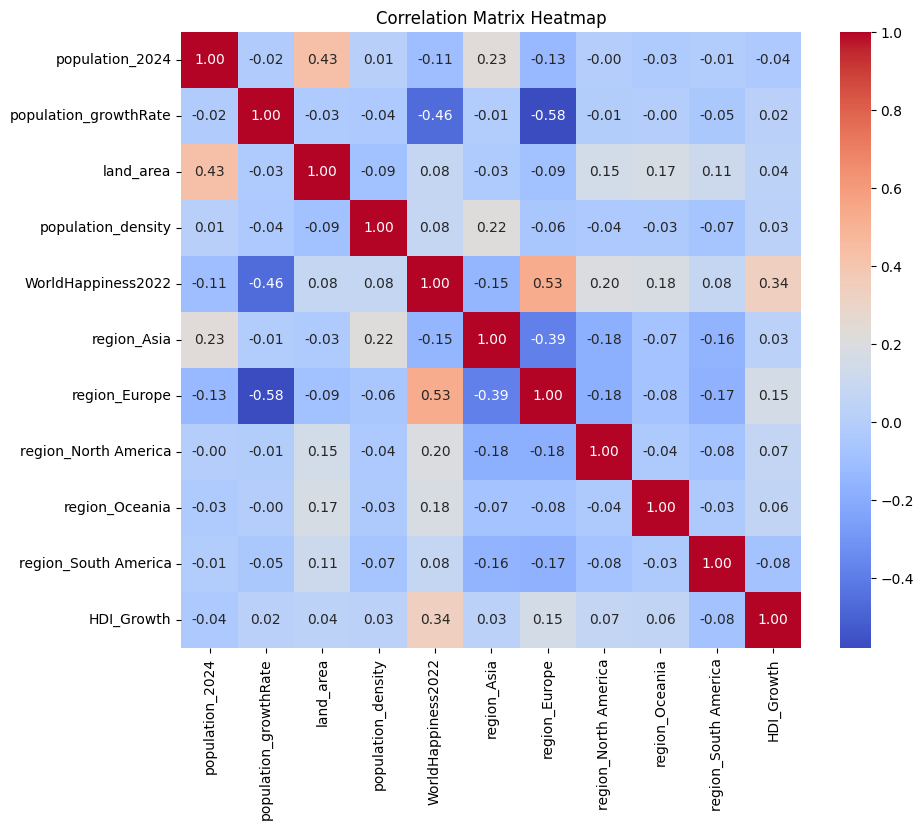

In [959]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# visualized correlation matrix

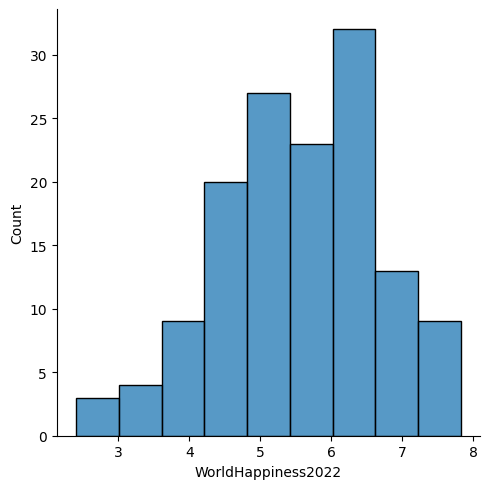

In [960]:
sns.displot(df['WorldHappiness2022'])

# checked distribution of WorldHappiness2022

In [961]:
df.columns

Index(['country', 'population_2024', 'population_growthRate', 'land_area',
       'population_density', 'WorldHappiness2022', 'region_Asia',
       'region_Europe', 'region_North America', 'region_Oceania',
       'region_South America', 'HDI_Growth'],
      dtype='object')

In [962]:
#df = df[df['land_area'] < df['land_area'].quantile(0.92)]

#df = df[df['WorldHappiness2022'] < df['WorldHappiness2022'].quantile(0.92)]

# decided not to use quantile method, I started to use it when I worked with poly1d_fn, but the final plot did not improve with it
# with this method, I would remove the top 8% of the countries, which turned out to ruin the model a bit, and final plot looks better without it

In [963]:
X = df[['population_2024', 'population_growthRate', 'land_area',
       'population_density', 'region_Asia',
       'region_Europe', 'region_North America', 'region_Oceania',
       'region_South America', 'HDI_Growth']]

y = df['WorldHappiness2022']

# selected features and target

In [964]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [965]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [966]:
predictions = lm.predict(X_test)

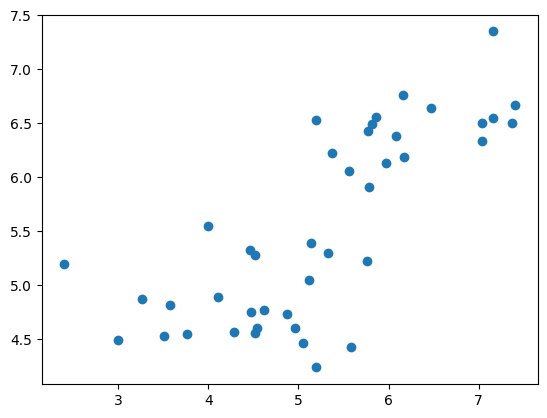

In [967]:
plt.scatter(y_test, predictions)
plt.show()

# checked predictions

In [968]:
df_sorted = df.sort_values(by='land_area', ascending=False)

removed_rows = df_sorted.head(7)

df = df_sorted[7:].reset_index(drop=True)

print("Removed Rows:")
print(removed_rows)

# This is baically for the last (additional part) 
# I removed the top 7 countries by land area, and checked the results

Removed Rows:
          country  population_2024  population_growthRate  land_area  \
8          Russia        143957079               -0.00337   17098242   
35         Canada         39107046                0.00840    9984670   
1           China       1425178782               -0.00035    9706961   
2   United States        341814420                0.00535    9372610   
6          Brazil        217637297                0.00561    8515767   
50      Australia         26699482                0.00985    7692024   
0           India       1441719852                0.00916    3287590   

    population_density  WorldHappiness2022  region_Asia  region_Europe  \
8               8.7903               5.459            0              1   
35              4.3619               7.025            0              0   
1             151.2174               5.585            1              0   
2              37.3673               6.977            0              0   
6              26.0390               6.

In [969]:
# let's try with some new imaginary data
tester_row = {
    'population_2024': 6000000,
    'population_growthRate': 0.001,
    'land_area': 350000,
    'population_density': 120,
    'region_Asia': 0,
    'region_Europe': 1,
    'region_North America': 0,
    'region_Oceania': 0,
    'region_South America': 0,
    'HDI_Growth': 0.03
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [970]:
result = lm.predict(tester_row)[0]

print()
print(f"Predicted Happines with {350000} land_area:")
print(f"{round(float(result), 2)}")
print("----------------")

# predictions are more or less accurate


Predicted Happines with 350000 land_area:
7.51
----------------


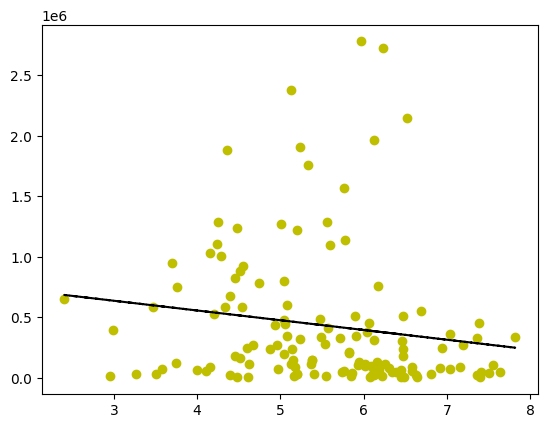

In [971]:
plot_x = df['WorldHappiness2022']
plot_y = df['land_area']

coef_plot = np.polyfit(plot_x,plot_y,1)
poly1d_fn = np.poly1d(coef_plot)

# poly1d_fn is now a function which takes in x and returns an estimate for y
#'--k'=black dashed line, 'yo' = yellow circle marker
plt.plot(plot_x, plot_y, 'yo', plot_x, poly1d_fn(plot_x), '--k')

# plot is probably not correct, but I tried to visualize the relationship between land_area and WorldHappiness2022